In [2]:
# libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from sodapy import Socrata



/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


KeyError: 'the_geom'

In [16]:
results = pd.read_json( r'https://controllerdata.lacity.org/resource/bawf-ixme.json?$limit=15000' )

# We'll need to convert to pandas DataFrame
public = pd.DataFrame.from_records(results)

public.sample(5)

objectid         ain  taxratearea  situshouseno  agencyclassno usecode  \
3530       3530  2786024902           16             0       236009.0    8800   
9275       9270  5303019902            4             0       236000.0    8800   
11855     11853  6121020905           19             0       374380.0     NaN   
12199     12197  7413036924           19             0       236970.0    010C   
2397       2397  2561016904           13             0       100220.0    8800   

        recdate taxratearea_city  usecode_2     usedescription  ...  \
3530   19670406      LOS ANGELES       88.0  Government Parcel  ...   
9275   19580501      LOS ANGELES       88.0  Government Parcel  ...   
11855  19861017      LOS ANGELES        NaN                NaN  ...   
12199  19961231      LOS ANGELES        1.0             Single  ...   
2397   19571129      LOS ANGELES       88.0  Government Parcel  ...   

      effectiveyear1 units1  bedrooms1  bathrooms1  sqft  propertylocation  \
3530             NaN    NaN        NaN         NaN   NaN               NaN   
9275             NaN    NaN        NaN         NaN   NaN               NaN   
11855            NaN    NaN        NaN         NaN   NaN               NaN   
12199            NaN    NaN        NaN         NaN   NaN               NaN   
2397             NaN    NaN        NaN         NaN   NaN               NaN   

       situsunit situsdirection situsfraction secondagencyname  
3530         NaN            NaN           NaN              NaN  
9275         NaN            NaN           NaN              NaN  
11855        NaN            NaN           NaN              NaN  
12199        NaN            NaN           NaN              NaN  
2397         NaN            NaN           NaN              NaN  

[5 rows x 50 columns]

In [17]:
public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   objectid                   13948 non-null  int64  
 1   ain                        13948 non-null  int64  
 2   taxratearea                13948 non-null  int64  
 3   situshouseno               13948 non-null  int64  
 4   agencyclassno              13608 non-null  float64
 5   usecode                    13709 non-null  object 
 6   recdate                    13948 non-null  int64  
 7   taxratearea_city           13948 non-null  object 
 8   usecode_2                  13707 non-null  float64
 9   usedescription             13698 non-null  object 
 10  usetype                    13698 non-null  object 
 11  legaldesc                  13948 non-null  object 
 12  councildistrict            13948 non-null  int64  
 13  countydistrict             13948 non-null  int

In [19]:
# looks like we have 33091 vacant parcels in LA incorporated, we will need to convert our df to gdf for vacant parcels
# since data is in lat/lon's we will assign the crs to WGS84 (epsg:4326)
public = gpd.GeoDataFrame(public, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(public.centroid_x, public.centroid_y))

In [20]:
public.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

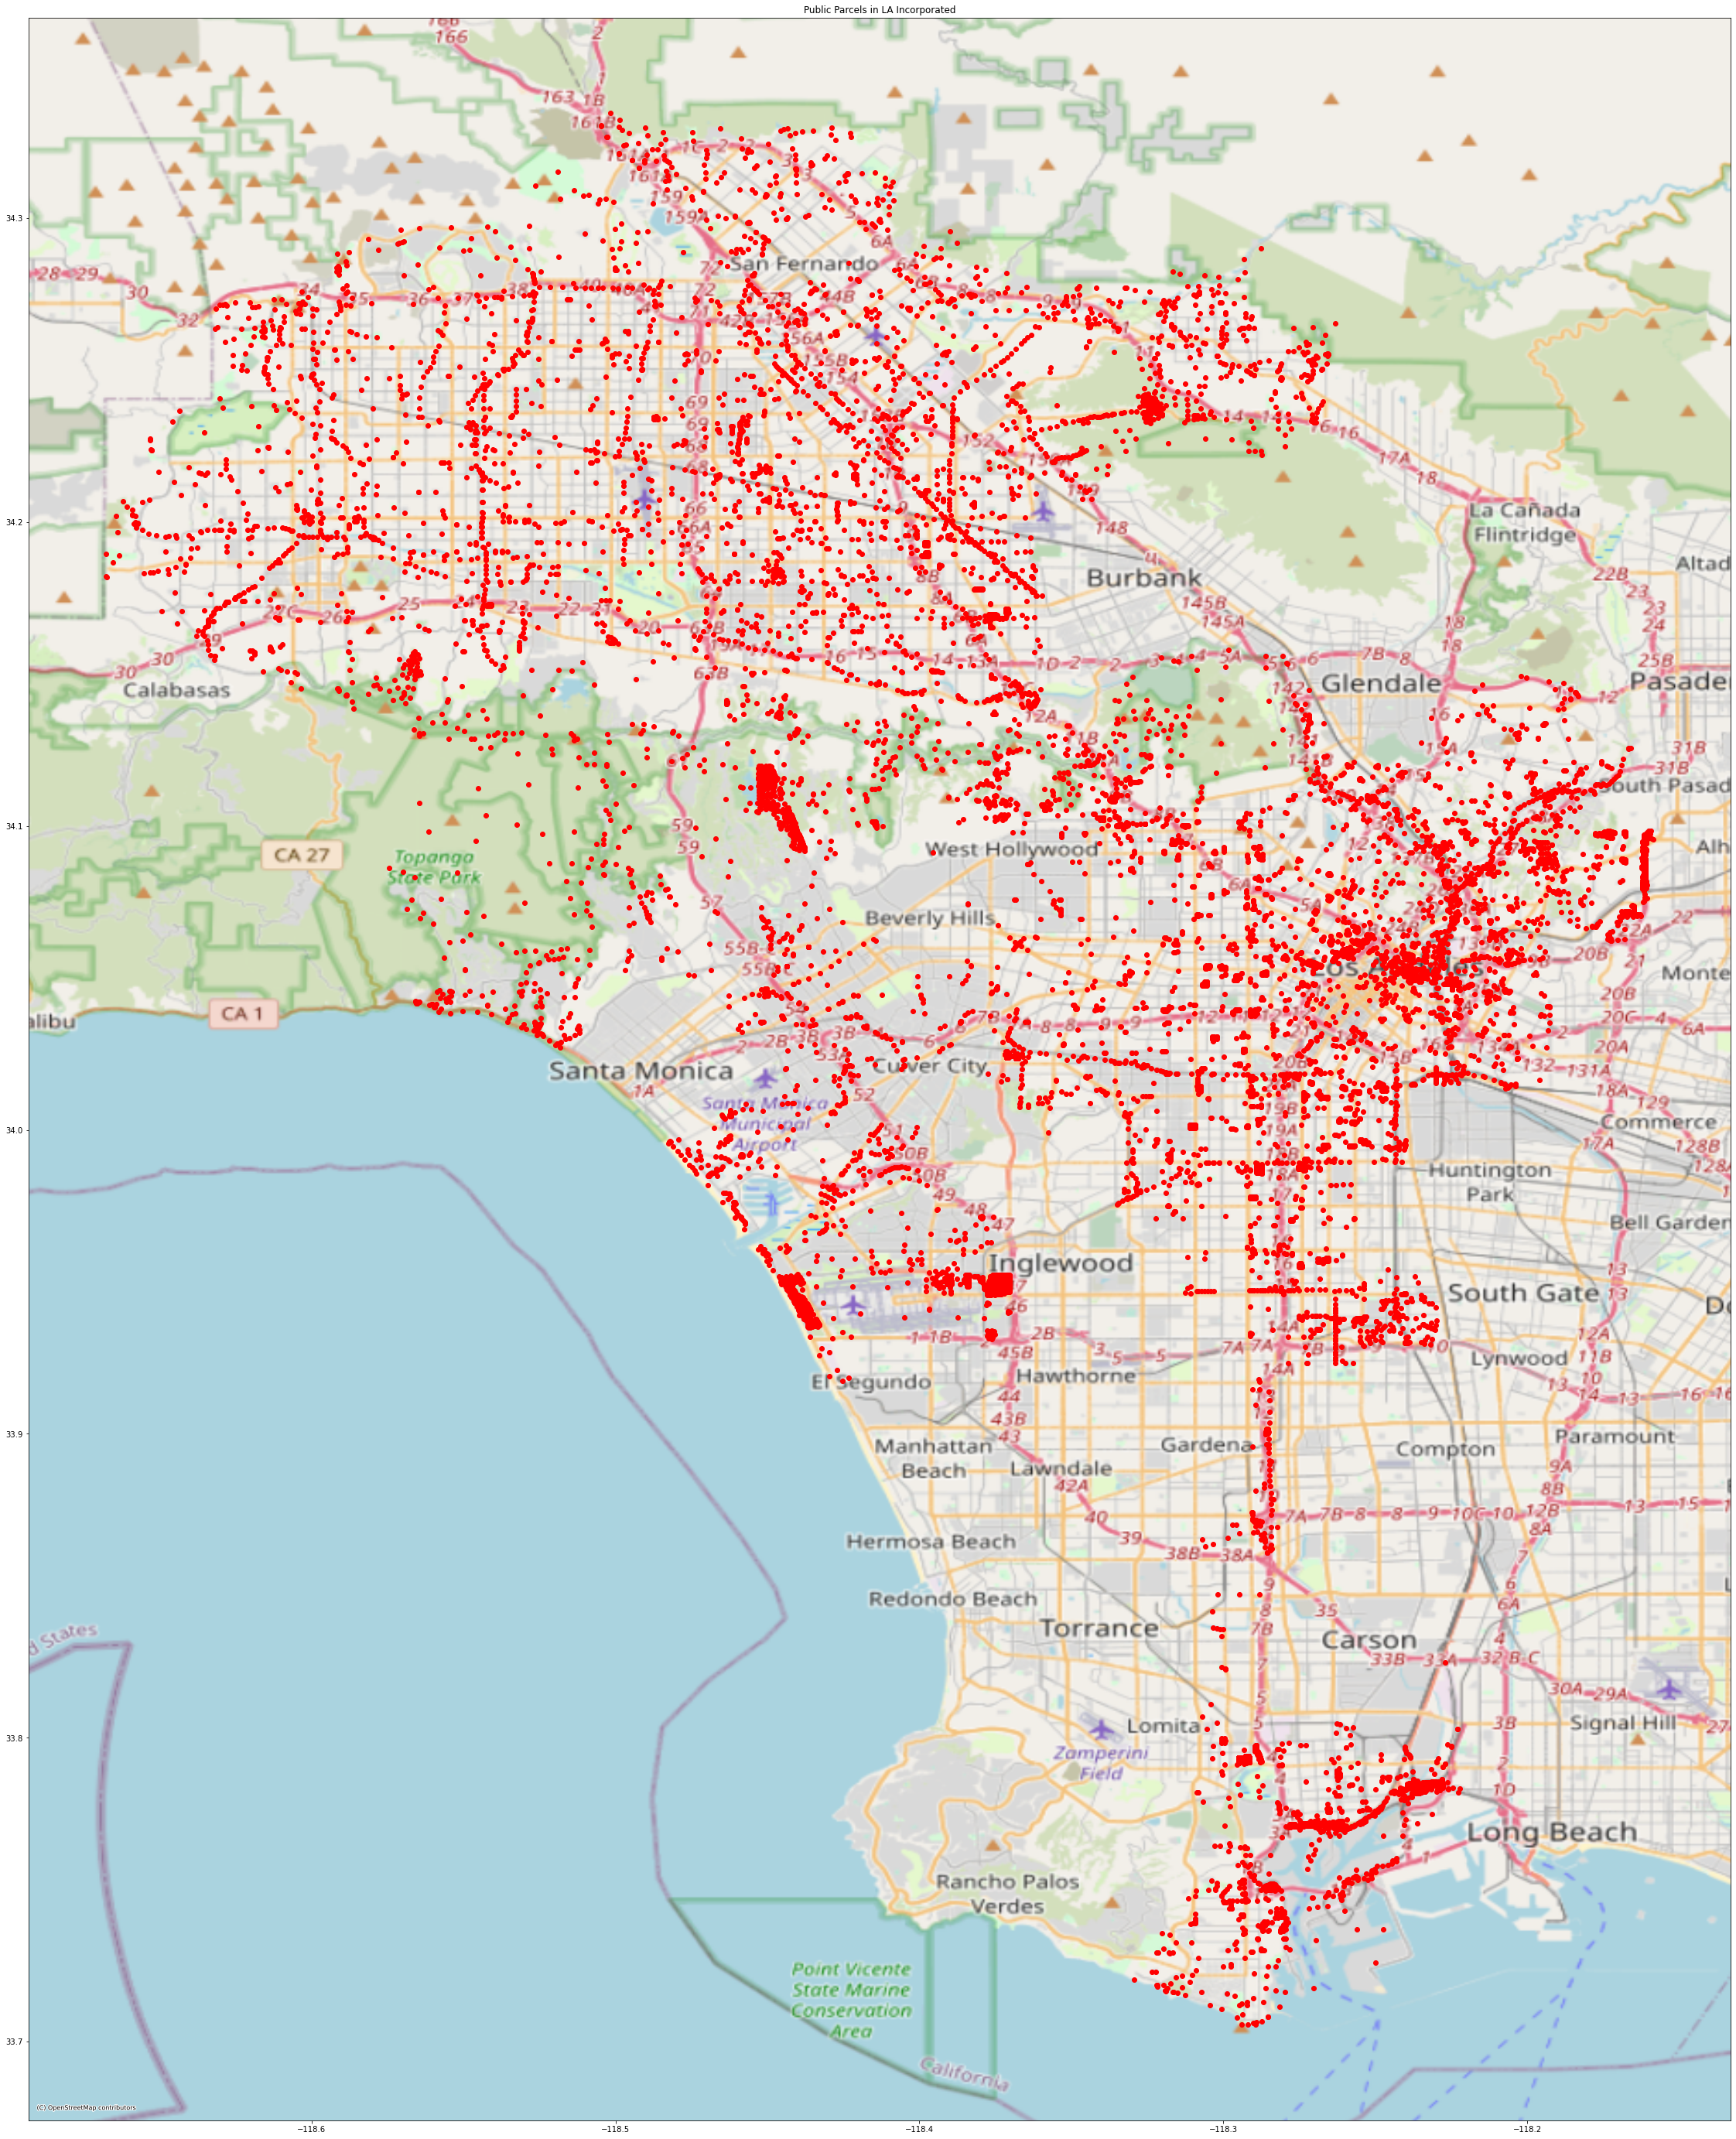

In [21]:
# to map vacant parcels
fig, ax = plt.subplots(figsize=(50,50))

public.plot(ax=ax,
                      color='red')

# keeping the axis on for now and will turn off later
ax.axis('on')

ax.set_title('Public Parcels in LA Incorporated')

# we are interested in seeing LA county map features and will use this basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=public.crs)

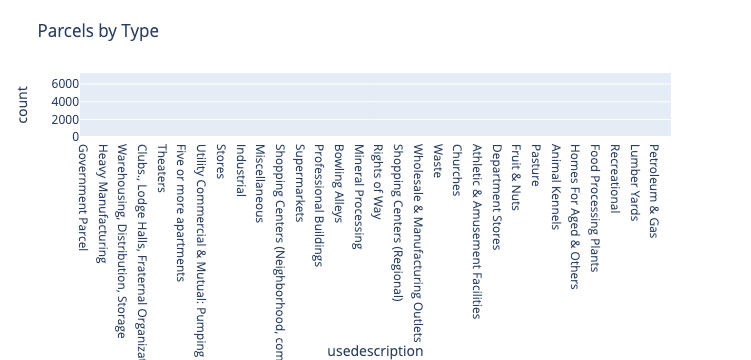

In [29]:
# for interactive plots
import plotly.express as px

# a simple bar chart, putting date on the x-axis
fig = px.bar(public,
       x='usedescription',
       title='Parcels by Type'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()